In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
import plotly.express as px
import datetime
import statsmodels.stats.api as sms
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from yellowbrick.features import parallel_coordinates
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data1 = pd.read_csv('Orginanation_Mortgage.csv')
data2 = pd.read_csv('Testgrp1.csv')
data3 = pd.merge(data1, data2, on ='ln_seq_number', how = 'inner')

In [3]:
data3.describe()

,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_ltv,orig_int_rate
count,4999.000000,4999.000000,4999.000000,4999.000000,4994.000000,4999.000000,4999.000000
mean,763.511702,4.424885,1.018404,73.072615,31.989788,71.888378,4.075215
std,38.993282,10.051285,0.171094,15.438921,10.011774,15.700272,0.263764
min,605.000000,0.000000,1.000000,12.000000,3.000000,12.000000,4.000000
25%,739.000000,0.000000,1.000000,66.000000,24.000000,63.000000,4.000000
50%,773.000000,0.000000,1.000000,78.000000,33.000000,75.000000,4.000000
75%,794.000000,0.000000,1.000000,80.000000,40.000000,80.000000,4.000000
max,835.000000,30.000000,4.000000,96.000000,61.000000,96.000000,5.000000


In [9]:
data3.describe(include ='all')

,ln_seq_number,credit_score,first_time_homebuyer_flag,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_ltv,orig_int_rate,property_st,property_type,ln_purpose,curr_ln_delq_stas
count,4999,4999.000000,4999,4999.000000,4999.000000,4999,4999.000000,4994.000000,4999.000000,4999.000000,4999,4999,4999,4999
unique,4999,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,52,4,3,2
top,F112Q2008234,NaN,N,NaN,NaN,P,NaN,NaN,NaN,NaN,CA,SF,N,Good
freq,1,NaN,4455,NaN,NaN,4539,NaN,NaN,NaN,NaN,564,3706,2039,4871
mean,NaN,763.511702,NaN,4.424885,1.018404,NaN,73.072615,31.989788,71.888378,4.075215,NaN,NaN,NaN,NaN
std,NaN,38.993282,NaN,10.051285,0.171094,NaN,15.438921,10.011774,15.700272,0.263764,NaN,NaN,NaN,NaN
min,NaN,605.000000,NaN,0.000000,1.000000,NaN,12.000000,3.000000,12.000000,4.000000,NaN,NaN,NaN,NaN
25%,NaN,739.000000,NaN,0.000000,1.000000,NaN,66.000000,24.000000,63.000000,4.000000,NaN,NaN,NaN,NaN
50%,NaN,773.000000,NaN,0.000000,1.000000,NaN,78.000000,33.000000,75.000000,4.000000,NaN,NaN,NaN,NaN
75%,NaN,794.000000,NaN,0.000000,1.000000,NaN,80.000000,40.000000,80.000000,4.000000,NaN,NaN,NaN,NaN


In [4]:
data3.dtypes

ln_seq_number                 object
credit_score                   int64
first_time_homebuyer_flag     object
mi_percent                     int64
unit_cnt                       int64
occupancy_status              object
orig_cltv                      int64
orig_debt_to_inc             float64
orig_ltv                       int64
orig_int_rate                  int64
property_st                   object
property_type                 object
ln_purpose                    object
curr_ln_delq_stas             object
dtype: object

Text(0.5, 1.0, 'Correlation matrix')

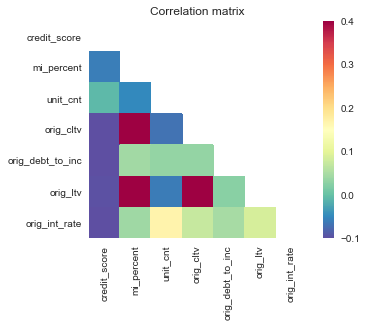

In [6]:
corrs = data3.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.1, vmax=.4)
plt.title('Correlation matrix')

In [7]:
data3.corr()

,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_ltv,orig_int_rate
credit_score,1.000000,-0.058225,-0.008040,-0.099115,-0.122919,-0.096372,-0.198453
mi_percent,-0.058225,1.000000,-0.047363,0.546351,0.044454,0.570468,0.041828
unit_cnt,-0.008040,-0.047363,1.000000,-0.067540,0.032948,-0.059865,0.168831
orig_cltv,-0.099115,0.546351,-0.067540,1.000000,0.033790,0.955526,0.072210
orig_debt_to_inc,-0.122919,0.044454,0.032948,0.033790,1.000000,0.025161,0.048394
orig_ltv,-0.096372,0.570468,-0.059865,0.955526,0.025161,1.000000,0.087352
orig_int_rate,-0.198453,0.041828,0.168831,0.072210,0.048394,0.087352,1.000000


In [8]:
data3.to_excel('MorgGrp1dataset.xlsx', sheet_name ='datasetgrp1')